<a href="https://colab.research.google.com/github/cabbagecongee/Deep_Learning_Review_and_Practice/blob/main/Deep_Learning_with_Python%2C_TensorFlow%2C_and_Keras_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize data to make easier for network, scales num 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential() #two types, seq is common, feed-forward
model.add(tf.keras.layers.Flatten()) #use as input layer to flatten data in tensor form
#dense layers
model.add(tf.keras.layers.Dense(128, activation= 'relu')) #(units =  128 neurons in hidden layer, stepper function = reulu)
model.add(tf.keras.layers.Dense(128, activation='relu'))
#output layer
model.add(tf.keras.layers.Dense(10, activation='softmax')) #(units = 10 neurons in output layer, softmax for probability distribution)

#parameters for training of the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  #loss is degree of error, loss metric, default categorical crossentropy
  #metrics = metrics you want to track as you go

#train model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8623 - loss: 0.4721
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9651 - loss: 0.1129
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9775 - loss: 0.0731


In [44]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)
#big delta = overfit

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9677 - loss: 0.1027
0.09021015465259552 0.972000002861023


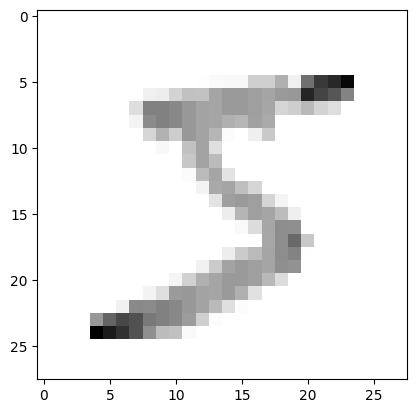

In [45]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
#print(x_train[0])

In [46]:
model.save('mnist_model.keras')

In [47]:
new_model = tf.keras.models.load_model('mnist_model.keras')

In [48]:
#make a prediction
predictions = new_model.predict([x_test])

 89/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


In [49]:
import numpy as np

print(np.argmax(predictions[0]))

7


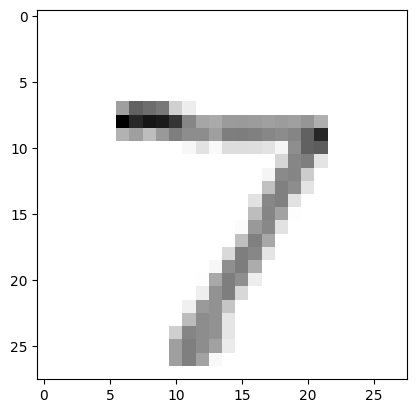

In [50]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()